In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load and preprocess the dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:

# Normalize the dataset
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
# Reshape the data for Conv2D layers
IMG_SIZE = 28
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [5]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


In [6]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=X_train.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


C:\Users\amitp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile and train the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_val, y_val))


Epoch 1/10


C:\Users\amitp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 47s 34ms/step - accuracy: 0.7305 - loss: 0.8125 - val_accuracy: 0.9693 - val_loss: 0.0953
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 45s 34ms/step - accuracy: 0.9365 - loss: 0.2165 - val_accuracy: 0.9825 - val_loss: 0.0546
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 45s 34ms/step - accuracy: 0.9512 - loss: 0.1615 - val_accuracy: 0.9863 - val_loss: 0.0451
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 45s 34ms/step - accuracy: 0.9609 - loss: 0.1300 - val_accuracy: 0.9875 - val_loss: 0.0376
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.9664 - loss: 0.1162 - val_accuracy: 0.9891 - val_loss: 0.0351
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 45s 34ms/step - accuracy: 0.9699 - loss: 0.0987 - val_accuracy: 0.9895 - val_loss: 0.0327
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 48s 36ms/step - accuracy: 0.9744 - loss: 0.0858 - val_accuracy: 0.9906 - val_loss: 0.0288
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.9763 - loss: 0.08

In [13]:

# Save the model
model.save('modelcopy1.h5')

In [14]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss on 10,000 test samples:", test_loss)
print("Validation Accuracy on 10,000 test samples:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9904 - loss: 0.0244
Test loss on 10,000 test samples: 0.020965605974197388
Validation Accuracy on 10,000 test samples: 0.9926000237464905


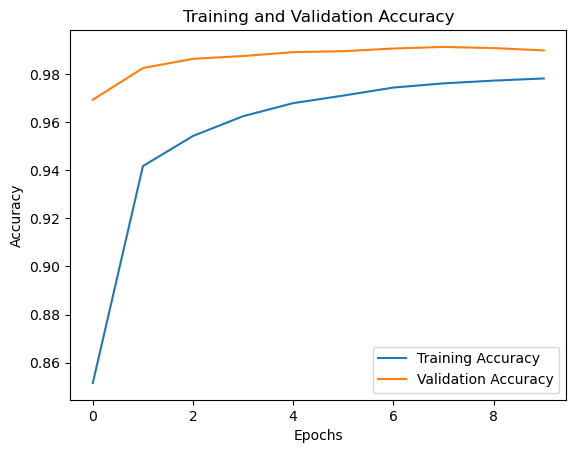

In [15]:

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [16]:
# Predict on a sample image
def preprocess_and_predict(image_path, model):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
    normalized = resized / 255.0
    reshaped = normalized.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    prediction = model.predict(reshaped)
    return np.argmax(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
7


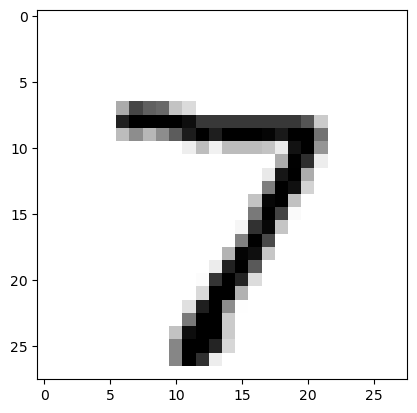

In [17]:
print(np.argmax(model.predict(X_test[0:1])))
plt.imshow(X_test[0].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [18]:

print(preprocess_and_predict('seven.png', model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
7
